## 소상공인시장진흥공단 Sbiz - 지역별 경영현황 eda, preprocessing 
- https://sg.sbiz.or.kr/godo/index.sg
- https://sg.sbiz.or.kr/godo/stat/updens.sg
- 재무데이터 사업자들의 주소(시군구), 업종 기준으로 merge하면 데이터 살리수있을듯???
- **주간인구수**: 시군구 단위의 주간인구통계 (단위:천명) /\
  **밀집도**: 인구 천명당 사업체수 /\
  **밀집도_중위값**: 세세분류 단위에서 밀집도 중위값 /\
  **밀집정도**: 밀집도 - 밀집도_중위값 (0 이상인 경우 " 고"로, 미안인 경우 " 저"로 구분) -->재무데이터와 결합시, 업종별 중위값의 평균값으로 고.저 구분 필요할 것으로 보임/\
  **동종근로자_임금_수준미만**: 연간 영업이익 대비 동종입금근로자 임금 수준미만인 업종 비중 /\
  **동종근로자_임금_수준미만_척도**: 4점 척도로 연간 영업이익 대비 등종업종근로자 임금 수준이 미만인 사업체 비중을 세세분류 수준에서, \
  사업체 중 차지하는 비중이 75 % 이상 " 매우 높음"\
  사업체 중 차지하는 비중이 50 ~ 7496 " 높음"\
  사업체 중 차지하는 비중이 25 ~ 4996 " 보통"\
  사업체 중 차지하는 비중이 25 % 이하 " 낮음"으로 평가

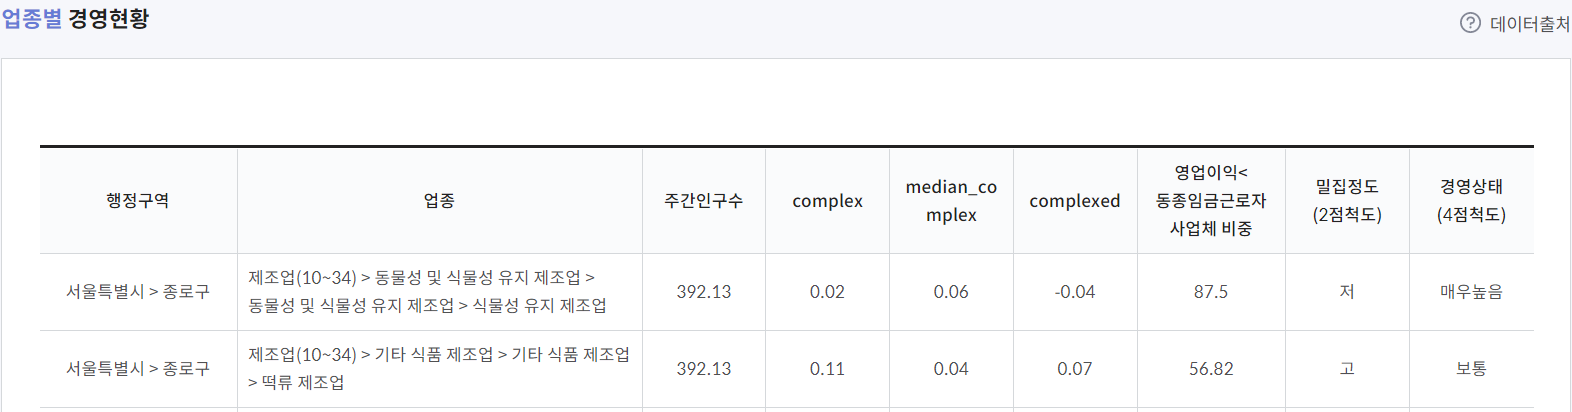

## preprocessing
- 업종명 기준으로 액티브_중소법인_기업외감_산업분류, 휴폐업_중소법인_기업개요_산업분류 결합


### 데이터 불러오기

In [1]:
import pandas as pd

df_sbiz=pd.read_csv('C:/Users/shcho/Desktop/윤영/sesac/공모전/data/1차정제/팀원 공통자료/sbiz_crawling_preprocessed.csv',encoding = 'utf-8')
df_sbiz.head()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,서울특별시 > 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저
1,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고
2,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저
3,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저
4,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저


In [2]:
#업종 유니크값으로 저장
pd.DataFrame(df_sbiz['업종'].unique()).to_excel('업종유니크값.xlsx')

#### 행정구역 칼럼 > 제거 후 공백 삽임

In [3]:
df_sbiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70055 entries, 0 to 70054
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   행정구역              70055 non-null  object 
 1   업종                70055 non-null  object 
 2   주간인구수             70055 non-null  float64
 3   밀집도               70055 non-null  float64
 4   밀집도_중위값           70055 non-null  float64
 5   밀집정도              70055 non-null  float64
 6   동종근로자_임금_수준미만     70055 non-null  float64
 7   동종근로자_임금_수준미만_척도  70055 non-null  object 
dtypes: float64(5), object(3)
memory usage: 4.3+ MB


In [4]:
df_sbiz['행정구역']=df_sbiz['행정구역'].str.replace('>', ' ')


In [5]:
df_sbiz.head()


,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저


-----------------------------------------------------------------------------------

### 업종 및 행정구역 칼럼 '>' 기준으로 분리하기

#### 업종칼럼 '>' 기준분리

In [6]:
df_sbiz['업종'][0]

'제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제조업 > 식물성 유지 제조업'

In [7]:
ind_split=df_sbiz['업종'].str.split('>')
ind_split

0        [제조업(10~34) ,  동물성 및 식물성 유지 제조업 ,  동물성 및 식물성 유...
1         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  떡류 제조업]
2         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  빵류 제조업]
3        [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  천연 및 ...
4         [제조업(10~34) ,  기타 식품 제조업 ,  기타 식품 제조업 ,  커피 가공업]
                               ...                        
70050    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70051    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70052    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70053    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
70054    [예술, 스포츠 및 여가관련 서비스업(90~91) ,  유원지 및 기타 오락관련 서...
Name: 업종, Length: 70055, dtype: object

In [8]:
ind_split[0]

['제조업(10~34) ', ' 동물성 및 식물성 유지 제조업 ', ' 동물성 및 식물성 유지 제조업 ', ' 식물성 유지 제조업']

- 기존 데이터프레임에 삽입

In [9]:
df_sbiz["대분류"] = ind_split.str.get(0)
df_sbiz["중분류"] = ind_split.str.get(1)
#중복인듯?
#df_sbiz["중분류2"] = ind_split.str.get(2)
df_sbiz["소분류"] = ind_split.str.get(3)
df_sbiz.head()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,대분류,중분류,소분류
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저,제조업(10~34),동물성 및 식물성 유지 제조업,식물성 유지 제조업
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고,제조업(10~34),기타 식품 제조업,떡류 제조업
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저,제조업(10~34),기타 식품 제조업,빵류 제조업
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저,제조업(10~34),기타 식품 제조업,천연 및 혼합 조제 조미료 제조업
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저,제조업(10~34),기타 식품 제조업,커피 가공업


- 대분류,중분류 칼럼 괄호 및 숫자, 뒤 공백 제거

In [10]:
df_sbiz['대분류2']=df_sbiz["대분류"].str.replace(r"\(.*\)","")
df_sbiz['대분류2']=df_sbiz["대분류2"].str.strip() #칼럼별로 적용할 경우str붙이기 , 안붙이면 리슽으에서만 가능
df_sbiz['중분류']=df_sbiz["중분류"].str.strip()
df_sbiz.head()


,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,대분류,중분류,소분류,대분류2
0,서울특별시 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저,제조업(10~34),동물성 및 식물성 유지 제조업,식물성 유지 제조업,제조업
1,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고,제조업(10~34),기타 식품 제조업,떡류 제조업,제조업
2,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저,제조업(10~34),기타 식품 제조업,빵류 제조업,제조업
3,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저,제조업(10~34),기타 식품 제조업,천연 및 혼합 조제 조미료 제조업,제조업
4,서울특별시 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저,제조업(10~34),기타 식품 제조업,커피 가공업,제조업


#### 행정구역 칼럼, 시도, 군구 나누기

In [11]:
address_split=df_sbiz['행정구역'].str.split('  ')
address_split[0]
address_split.str.get(1)

0         종로구
1         종로구
2         종로구
3         종로구
4         종로구
         ... 
70050     양양군
70051     양양군
70052     양양군
70053     양양군
70054     양양군
Name: 행정구역, Length: 70055, dtype: object

In [12]:
df_sbiz["시도"] = address_split.str.get(0)
df_sbiz["군구"] = address_split.str.get(1)
df_sbiz.tail()

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,대분류,중분류,소분류,대분류2,시도,군구
70050,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.87,0.04,0.83,78.26,고,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,노래 연습장 운영업,"예술, 스포츠 및 여가관련 서비스업",강원도,양양군
70051,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.19,0.04,0.15,60.00,고,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,기타 오락장 운영업,"예술, 스포츠 및 여가관련 서비스업",강원도,양양군
70052,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,1.06,0.04,1.01,100.00,고,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,기타 수상오락 서비스업,"예술, 스포츠 및 여가관련 서비스업",강원도,양양군
70053,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.15,0.04,0.11,100.00,고,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,복권 발행 및 판매업,"예술, 스포츠 및 여가관련 서비스업",강원도,양양군
70054,강원도 양양군,"예술, 스포츠 및 여가관련 서비스업(90~91) > 유원지 및 기타 오락관련 서비스...",26.52,0.19,0.04,0.15,100.00,고,"예술, 스포츠 및 여가관련 서비스업(90~91)",유원지 및 기타 오락관련 서비스업,그 외 기타 분류 안된 오락관련 서비스업,"예술, 스포츠 및 여가관련 서비스업",강원도,양양군


In [13]:
df_sbiz.to_excel('sbiz_preprocessed.xlsx')

In [14]:
df_sbiz["군구"]

0         종로구
1         종로구
2         종로구
3         종로구
4         종로구
         ... 
70050     양양군
70051     양양군
70052     양양군
70053     양양군
70054     양양군
Name: 군구, Length: 70055, dtype: object

#### 대분류 종류 살펴보기

In [15]:
pd.DataFrame(df_sbiz['대분류2'].value_counts())

,대분류2
도매 및 소매업,23469
제조업,14433
건설업,6757
"협회 및 단체, 수리 및 기타 개인 서비스업",5268
"예술, 스포츠 및 여가관련 서비스업",4688
숙박 및 음식점업,3308
"사업시설 관리, 사업 지원 및 임대 서비스업",3162
교육 서비스업,1976
부동산업,1737
운수 및 창고업,1686


#### 중분류 종류살펴보기

In [16]:
pd.DataFrame(df_sbiz['중분류'].value_counts())


,중분류
생활용품 도매업,4625
음ㆍ식료품 및 담배 도매업,2803
음식점업,2320
유원지 및 기타 오락관련 서비스업,2033
그 외 기타 개인 서비스업,1942
...,...
악기 제조업,3
"증기, 냉ㆍ온수 및 공기 조절 공급업",3
내륙 수상 및 항만 내 운송업,1
마그네틱 및 광학 매체 제조업,1


In [17]:
len(df_sbiz)

70055

#### 대분류2 기준 groupby, 주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만 평균 으로
- 외감기업 정보들과 결합을 위함
- 밀집도에 음수 데이터도 존재함

In [18]:
sbiz_mean=df_sbiz.groupby(['대분류2']).mean()
sbiz_mean.reset_index(inplace = True )
sbiz_mean
#sbiz_mean['대분류2']=sbiz_mean.index
#sbiz_mean.rename(columns = {'대분류2':'ind_01_cate'})

,대분류2,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,건설업,321.464287,0.093709,0.047977,0.045109,65.210075
1,교육 서비스업,321.762171,0.150703,0.057880,0.093578,92.805582
2,금융 및 보험업,426.577366,0.034407,0.023768,0.013364,85.550730
3,도매 및 소매업,278.661347,0.134628,0.058279,0.076357,76.565741
4,보건업 및 사회복지 서비스업,296.543788,0.116900,0.104214,0.013252,44.376389
5,부동산업,327.541664,0.217714,0.033212,0.188803,66.844139
6,"사업시설 관리, 사업 지원 및 임대 서비스업",370.865190,0.029263,0.021768,0.009108,68.620300
7,"수도, 하수 및 폐기물 처리, 원료 재생업",289.161590,0.016287,0.009614,0.006820,69.521268
8,숙박 및 음식점업,280.132709,0.876611,0.284456,0.594846,74.439181
9,"예술, 스포츠 및 여가관련 서비스업",308.401160,0.081271,0.035783,0.045132,84.392611


- 대분류2->ind_01_cate 칼럼명 변경

In [19]:
sbiz_mean=sbiz_mean.rename(columns = {'대분류2':'ind_01_cate'})

In [20]:
sbiz_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ind_01_cate    14 non-null     object 
 1   주간인구수          14 non-null     float64
 2   밀집도            14 non-null     float64
 3   밀집도_중위값        14 non-null     float64
 4   밀집정도           14 non-null     float64
 5   동종근로자_임금_수준미만  14 non-null     float64
dtypes: float64(5), object(1)
memory usage: 800.0+ bytes


In [21]:
#칼럼명 변경 및 공백제거->공백제거안하면 merge불가!!
sbiz_mean['ind_01_cate']=sbiz_mean['ind_01_cate'].str.strip()


In [22]:
sbiz_mean

,ind_01_cate,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,건설업,321.464287,0.093709,0.047977,0.045109,65.210075
1,교육 서비스업,321.762171,0.150703,0.057880,0.093578,92.805582
2,금융 및 보험업,426.577366,0.034407,0.023768,0.013364,85.550730
3,도매 및 소매업,278.661347,0.134628,0.058279,0.076357,76.565741
4,보건업 및 사회복지 서비스업,296.543788,0.116900,0.104214,0.013252,44.376389
5,부동산업,327.541664,0.217714,0.033212,0.188803,66.844139
6,"사업시설 관리, 사업 지원 및 임대 서비스업",370.865190,0.029263,0.021768,0.009108,68.620300
7,"수도, 하수 및 폐기물 처리, 원료 재생업",289.161590,0.016287,0.009614,0.006820,69.521268
8,숙박 및 음식점업,280.132709,0.876611,0.284456,0.594846,74.439181
9,"예술, 스포츠 및 여가관련 서비스업",308.401160,0.081271,0.035783,0.045132,84.392611


In [23]:
#df_sbiz.iloc[:,[2,3,4,5,6]]

#### 중분류 기준 groupby, 주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만 평균 으로
- 외감기업 정보들과 결합을 위함
- 밀집도에 음수 데이터도 존재함

In [24]:
sbiz_mean2=df_sbiz.groupby(['중분류']).mean()
sbiz_mean2.reset_index(inplace = True )
#칼럼명 변경 및 공백제거->공백제거안하면 merge불가!!
sbiz_mean2['중분류']=sbiz_mean2['중분류'].str.strip()
sbiz_mean2

,중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,1차 비철금속 제조업,329.175833,0.021071,0.02,0.005476,43.591071
1,1차 철강 제조업,353.857168,0.041387,0.02,0.021792,42.512023
2,가구 제조업,265.650193,0.070937,0.04,0.032755,63.016584
3,가전제품 및 정보 통신장비 소매업,177.328099,0.213585,0.13,0.085724,74.669719
4,가정용 기기 제조업,382.446036,0.021171,0.02,0.004955,57.557207
...,...,...,...,...,...,...
144,항공 화물 운송업,484.020000,0.000000,0.00,0.000000,50.000000
145,"항공기, 우주선 및 부품 제조업",472.965455,0.029091,0.02,0.014545,39.548182
146,해상 운송업,284.100127,0.041772,0.01,0.028101,57.890633
147,화학섬유 제조업,400.450714,0.022143,0.02,0.004286,48.889286


#### 소분류 기준 groupby, 주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만 평균 으로
- 외감기업 정보들과 결합을 위함
- 밀집도에 음수 데이터도 존재함

In [25]:
sbiz_mean3=df_sbiz.groupby(['소분류']).mean()
sbiz_mean3.reset_index(inplace = True )
sbiz_mean3

,소분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,1차 금속제품 도매업,218.793216,0.120877,0.03,0.090994,59.204094
1,"1차 유리제품, 유리섬유 및 광학용 유리 제조업",429.626000,0.014000,0.02,-0.002000,26.666000
2,가공 및 정제염 제조업,334.490000,0.015000,0.02,-0.005000,54.165000
3,가구 소매업,178.736863,0.188170,0.11,0.079085,73.134183
4,가금류 가공 및 저장 처리업,347.687556,0.024000,0.02,0.005556,35.774444
...,...,...,...,...,...,...
779,화초 및 식물 소매업,203.197766,0.351383,0.08,0.268617,85.565745
780,화학섬유 방적업,261.978750,0.049375,0.03,0.019375,41.905000
781,화학섬유직물 직조업,343.332041,0.136122,0.03,0.108163,41.450816
782,화훼류 및 식물 도매업,321.677652,0.103765,0.02,0.080040,84.071903


-----------------------------------------------------------------------

### 휴폐업_중소법인_기업개요_산업분류xlsx 와 업종 대분류 기준 결합 

In [26]:
close_fin=pd.read_excel('C:/Users/shcho/Desktop/윤영/sesac/공모전/data/1차정제/팀원 공통자료/휴폐업_중소법인_기업개요_산업분류.xlsx',index_col=0)
close_fin['close']='Y'
close_fin.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,close
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0,제조업,자동차 및 트레일러 제조업,Y
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0,도매 및 소매업,도매 및 상품 중개업,Y
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0,도매 및 소매업,도매 및 상품 중개업,Y
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0,제조업,금속 가공제품 제조업; 기계 및 가구 제외,Y
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0,제조업,1차 금속 제조업,Y


#### 산업 대분류 종류 살펴보기


In [27]:
pd.DataFrame(close_fin['ind_01_cate'].value_counts())

,ind_01_cate
제조업,2433
도매 및 소매업,1446
건설업,677
정보통신업,470
"전문, 과학 및 기술 서비스업",366
부동산업,327
숙박 및 음식점업,223
"사업시설 관리, 사업 지원 및 임대 서비스업",167
운수 및 창고업,129
금융 및 보험업,104


#### 산업 중분류 종류 살펴보기

In [28]:
pd.DataFrame(close_fin['ind_02_cate'].value_counts()).to_excel('휴폐업중분류.xlsx')

- 'ind_01_cate'와 df_sbizd의 '대분류'가 일치함

In [29]:
close_fin[close_fin['ind_01_cate']=='사업시설 관리, 사업 지원 및 임대 서비스업']



,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,close
153,1058166586,NaN,경기시설관리,(주),Gyeonggi,M,2,2,1,1,...,1,NaN,건물종합관리,NaN,NaN,황규홍,36.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업시설 관리 및 조경 서비스업,Y
171,1058612125,(주),에스피엠,NaN,"SPM CO.,LTD.",M,2,2,1,1,...,1,NaN,문화교육사업,NaN,NaN,송순영,185.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업시설 관리 및 조경 서비스업,Y
178,2098116277,NaN,한성안전관리,(주),"Hansung Safety management Co., Ltd.",M,2,2,1,1,...,1,NaN,"경비, 청소용역",NaN,hansung4181 co.kr,조윤수,198.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업 지원 서비스업,Y
215,5148120178,(주),내외안전산업,NaN,"NAE OE ANJUN Co.,Ltd.",M,2,2,1,1,...,1,NaN,위생관리 외,NaN,www.ssno.kr,윤사룡,41.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업 지원 서비스업,Y
262,1168111214,(주),엠피에스,NaN,M P S Inc.,M,2,2,1,1,...,1,NaN,"식음료, 다류 및 주류판매업",NaN,www.imps.kr,정해용,107.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업시설 관리 및 조경 서비스업,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,4328101530,NaN,대흥씨에스,(주),"Daeheung CS Co., Ltd.",M,2,2,1,1,...,1,NaN,운수업,NaN,NaN,엄철성,NaN,"사업시설 관리, 사업 지원 및 임대 서비스업",사업 지원 서비스업,Y
6637,1738101612,(주),피엘산업,NaN,"PL Industry Co., Ltd.",M,2,2,1,1,...,1,NaN,1. 인력공급 및 파견업,NaN,NaN,정현아,1.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업 지원 서비스업,Y
6672,2908700910,(주),장원인터내셔널,NaN,"Jangwon International Co., Ltd.",M,2,2,1,1,...,1,NaN,NaN,NaN,NaN,김병규,NaN,"사업시설 관리, 사업 지원 및 임대 서비스업",사업 지원 서비스업,Y
6674,8438101685,(주),오퍼튜니티,NaN,opportunity Inc.,M,2,2,1,1,...,1,NaN,인터넷정보서비스업,NaN,NaN,윤지혁,6.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업 지원 서비스업,Y


#### 대분류 업종 기준 sbiz_mean와 결합

- merge, close_fin+sbiz_mean 

In [30]:
close_temp1=pd.merge(close_fin,sbiz_mean,on='ind_01_cate',how='left')
close_temp1.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,close,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,안상동,40.0,제조업,자동차 및 트레일러 제조업,Y,331.158781,0.075125,0.029797,0.044914,58.318278
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,소재필,13.0,도매 및 소매업,도매 및 상품 중개업,Y,278.661347,0.134628,0.058279,0.076357,76.565741
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,이상호,1.0,도매 및 소매업,도매 및 상품 중개업,Y,278.661347,0.134628,0.058279,0.076357,76.565741
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,김정남외 1명,6.0,제조업,금속 가공제품 제조업; 기계 및 가구 제외,Y,331.158781,0.075125,0.029797,0.044914,58.318278
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,박성진,40.0,제조업,1차 금속 제조업,Y,331.158781,0.075125,0.029797,0.044914,58.318278


- 밀집정도 : 밀집도_중위값>=0->고, <0->저 로 변수 생성

In [31]:
if close_temp1['밀집도_중위값']>=0:
    close_temp1['밀집정도']='고'
else : 
    close_temp1['밀집정도']='저'
close_temp1.ㅗㄷ

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
close_temp1.to_excel("sbiz_휴폐업_기업개요_산업분류_결합.xlsx")

- 대분류 업종으로 merge안된 데이터 989개(약 15%)

In [32]:
close_temp1['밀집도'].isnull().sum()

989

In [33]:
len(close_temp1)

6739

- 3가지 업종에 대한 sbiz 업종별 경영현황 데이터 없음

In [34]:
pd.DataFrame(close_temp1[close_temp1['밀집도'].isnull()].ind_01_cate.value_counts())

,ind_01_cate
정보통신업,470
"전문, 과학 및 기술 서비스업",366
"공공 행정, 국방 및 사회보장 행정",1


#### 중분류 업종 기준 sbiz_mean와 결합
- merge할경우 대다수의 데이터가 불일치->6703개

In [35]:
close_temp2=pd.merge(close_fin,sbiz_mean2,left_on='ind_02_cate',right_on='중분류',how='left')
close_temp2.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,EMP_CNT,ind_01_cate,ind_02_cate,close,중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,40.0,제조업,자동차 및 트레일러 제조업,Y,NaN,NaN,NaN,NaN,NaN,NaN
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,13.0,도매 및 소매업,도매 및 상품 중개업,Y,NaN,NaN,NaN,NaN,NaN,NaN
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,1.0,도매 및 소매업,도매 및 상품 중개업,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,6.0,제조업,금속 가공제품 제조업; 기계 및 가구 제외,Y,NaN,NaN,NaN,NaN,NaN,NaN
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,40.0,제조업,1차 금속 제조업,Y,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
len(close_temp2)

6739

- 중분류 업종으로 merge안된 데이터 6703개

In [37]:
close_temp2['중분류'].isnull().sum()

6703

###  액티브_중소법인_기업외감_산업분류.xlsx 와 업종 대분류 기준 결합

In [38]:
active_fin=pd.read_excel('C:/Users/shcho/Desktop/윤영/sesac/공모전/data/1차정제/팀원 공통자료/액티브_중소법인_기업외감_산업분류.xlsx',index_col=0)
active_fin['close']='N'
active_fin.head()


,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,close
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0,도매 및 소매업,소매업; 자동차 제외,N
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0,제조업,"가죽, 가방 및 신발 제조업",N
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0,운수 및 창고업,육상 운송 및 파이프라인 운송업,N
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0,제조업,자동차 및 트레일러 제조업,N
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0,도매 및 소매업,도매 및 상품 중개업,N


#### 산업 대분류 종류 살펴보기

In [39]:
pd.DataFrame(active_fin['ind_01_cate'].value_counts())

,ind_01_cate
제조업,11255
도매 및 소매업,4497
부동산업,4189
건설업,2418
운수 및 창고업,1058
"전문, 과학 및 기술 서비스업",1056
"사업시설 관리, 사업 지원 및 임대 서비스업",990
정보통신업,952
금융 및 보험업,684
숙박 및 음식점업,551


#### 산업 중분류 종류 살펴보기

In [40]:
pd.DataFrame(active_fin['ind_02_cate'].value_counts())

,ind_02_cate
부동산업,4189
도매 및 상품 중개업,3534
기타 기계 및 장비 제조업,1645
종합 건설업,1613
자동차 및 트레일러 제조업,1133
...,...
환경 정화 및 복원업,7
보험 및 연금업,6
수도업,5
"공공 행정, 국방 및 사회보장 행정",5


#### 대분류 업종 기준 sbiz_mean와 결합
- merge, active_fin+sbiz_mean 

In [41]:
active_temp1=pd.merge(active_fin,sbiz_mean,on='ind_01_cate',how='left')
active_temp1.to_excel("sbiz_액티브_기업개요_산업분류_결합.xlsx")
active_temp1.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,CEO_NM,EMP_CNT,ind_01_cate,ind_02_cate,close,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,홍순철외 1명,43.0,도매 및 소매업,소매업; 자동차 제외,N,278.661347,0.134628,0.058279,0.076357,76.565741
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,이스테판상수외 1명,35.0,제조업,"가죽, 가방 및 신발 제조업",N,331.158781,0.075125,0.029797,0.044914,58.318278
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,김명화,149.0,운수 및 창고업,육상 운송 및 파이프라인 운송업,N,271.499597,0.431554,0.051115,0.383458,65.806263
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,김명구,75.0,제조업,자동차 및 트레일러 제조업,N,331.158781,0.075125,0.029797,0.044914,58.318278
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,김홍득,3.0,도매 및 소매업,도매 및 상품 중개업,N,278.661347,0.134628,0.058279,0.076357,76.565741


In [42]:
len(active_temp1)

28982

- str.contains

In [43]:
sbiz_mean['ind_01_cate'].values.tolist()

['건설업',
 '교육 서비스업',
 '금융 및 보험업',
 '도매 및 소매업',
 '보건업 및 사회복지 서비스업',
 '부동산업',
 '사업시설 관리, 사업 지원 및 임대 서비스업',
 '수도, 하수 및 폐기물 처리, 원료 재생업',
 '숙박 및 음식점업',
 '예술, 스포츠 및 여가관련 서비스업',
 '운수 및 창고업',
 '전기, 가스, 증기 및 공기 조절 공급업',
 '제조업',
 '협회 및 단체, 수리 및 기타 개인 서비스업']

In [44]:
sbiz_mean2['중분류'].values.tolist()

['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보 통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사 제품 제조업',
 '개인 및 가정용품 수리업',
 '거주 복지시설 운영업',
 '건물 건설업',
 '건물ㆍ산업설비 청소 및 방제 서비스업',
 '건물설비 설치 공사업',
 '건축 자재, 철물 및 난방장치 도매업',
 '경비, 경호 및 탐정업',
 '고무제품 제조업',
 '고용 알선 및 인력 공급업',
 '곡물 가공품, 전분 및 전분제품 제조업',
 '골판지, 종이 상자 및 종이 용기 제조업',
 '과실, 채소 가공 및 저장 처리업',
 '교육 지원 서비스업',
 '구조용 금속제품, 탱크 및 증기발생기 제조업',
 '귀금속 및 장신용품 제조업',
 '그 외 기타 개인 서비스업',
 '그 외 기타 운송장비 제조업',
 '그 외 기타 제품 제조업',
 '금속 주조업',
 '금융 지원 서비스업',
 '기계장비 및 관련 물품 도매업',
 '기록매체 복제업',
 '기반조성 및 시설물 축조관련 전문공사업',
 '기초 의약 물질 및 생물학적 제제 제조업',
 '기초 화학물질 제조업',
 '기타 교육기관',
 '기타 금속 가공제품 제조업',
 '기타 금융업',
 '기타 보건업',
 '기타 비금속 광물제품 제조업',
 '기타 사업 지원 서비스업',
 '기타 상품 전문 소매업',
 '기타 생활용품 소매업',
 '기타 섬유제품 제조업',
 '기타 숙박업',
 '기타 식품 제조업',
 '기타 운송관련 서비스업',
 '기타 전기장비 제조업',
 '기타 전문 도매업',
 '기타 종이 및 판지 제품 제조업',
 '기타 화학제품 제조업',
 '나무제품 제조업',
 '낙농제품 및 식용 빙과류 제조업',
 '내륙 수상 및 항만 내 운송업',
 '내화, 비내화 요업제품 제조업',
 '도서관, 사적지 및 유사 여가관련 서비스업',
 '도축, 육류 가공 및 저장 처리업',
 '동물성 및 식물성 유지 제조업',
 '마그네틱 및 광학 매체

#### 중분류 기준 groupby, 주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만 평균 으로
- merge할경우 대다수의 데이터가 불일치->28794 개

In [45]:
len(active_fin)

28982

In [46]:
active_temp2=pd.merge(active_fin,sbiz_mean2,left_on='ind_02_cate',right_on='중분류',how='left')
active_temp2.head()

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,EMP_CNT,ind_01_cate,ind_02_cate,close,중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,43.0,도매 및 소매업,소매업; 자동차 제외,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,35.0,제조업,"가죽, 가방 및 신발 제조업",N,NaN,NaN,NaN,NaN,NaN,NaN
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,149.0,운수 및 창고업,육상 운송 및 파이프라인 운송업,N,NaN,NaN,NaN,NaN,NaN,NaN
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,75.0,제조업,자동차 및 트레일러 제조업,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,3.0,도매 및 소매업,도매 및 상품 중개업,N,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
active_temp2['중분류'].isnull().sum()

28794

-------------------------------------------------

### in 활용한'ind_02_cate'의 '중분류'포함여부

In [48]:
sbiz_cate2=sbiz_mean2['중분류'].values.tolist()
len(sbiz_cate2)

149

In [49]:
sbiz_cate2

['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보 통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사 제품 제조업',
 '개인 및 가정용품 수리업',
 '거주 복지시설 운영업',
 '건물 건설업',
 '건물ㆍ산업설비 청소 및 방제 서비스업',
 '건물설비 설치 공사업',
 '건축 자재, 철물 및 난방장치 도매업',
 '경비, 경호 및 탐정업',
 '고무제품 제조업',
 '고용 알선 및 인력 공급업',
 '곡물 가공품, 전분 및 전분제품 제조업',
 '골판지, 종이 상자 및 종이 용기 제조업',
 '과실, 채소 가공 및 저장 처리업',
 '교육 지원 서비스업',
 '구조용 금속제품, 탱크 및 증기발생기 제조업',
 '귀금속 및 장신용품 제조업',
 '그 외 기타 개인 서비스업',
 '그 외 기타 운송장비 제조업',
 '그 외 기타 제품 제조업',
 '금속 주조업',
 '금융 지원 서비스업',
 '기계장비 및 관련 물품 도매업',
 '기록매체 복제업',
 '기반조성 및 시설물 축조관련 전문공사업',
 '기초 의약 물질 및 생물학적 제제 제조업',
 '기초 화학물질 제조업',
 '기타 교육기관',
 '기타 금속 가공제품 제조업',
 '기타 금융업',
 '기타 보건업',
 '기타 비금속 광물제품 제조업',
 '기타 사업 지원 서비스업',
 '기타 상품 전문 소매업',
 '기타 생활용품 소매업',
 '기타 섬유제품 제조업',
 '기타 숙박업',
 '기타 식품 제조업',
 '기타 운송관련 서비스업',
 '기타 전기장비 제조업',
 '기타 전문 도매업',
 '기타 종이 및 판지 제품 제조업',
 '기타 화학제품 제조업',
 '나무제품 제조업',
 '낙농제품 및 식용 빙과류 제조업',
 '내륙 수상 및 항만 내 운송업',
 '내화, 비내화 요업제품 제조업',
 '도서관, 사적지 및 유사 여가관련 서비스업',
 '도축, 육류 가공 및 저장 처리업',
 '동물성 및 식물성 유지 제조업',
 '마그네틱 및 광학 매체

In [50]:
cate_list=close_fin['ind_02_cate'].to_list()
cate_list[1]

'도매 및 상품 중개업'

In [51]:
len(cate_list)

6739

- 포함하면 +1카운팅->36개 행

In [60]:
cnt=0
for i in cate_list:
    #print(i)
    if i in sbiz_cate2:
        #print(i)
        cnt+=1
print(cnt)
    

소매업; 자동차 제외
가죽, 가방 및 신발 제조업
육상 운송 및 파이프라인 운송업
자동차 및 트레일러 제조업
도매 및 상품 중개업
숙박업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
도매 및 상품 중개업
섬유제품 제조업; 의복 제외
자동차 및 트레일러 제조업
도매 및 상품 중개업
창고 및 운송관련 서비스업
사업 지원 서비스업
금속 가공제품 제조업; 기계 및 가구 제외
육상 운송 및 파이프라인 운송업
부동산업
금속 가공제품 제조업; 기계 및 가구 제외
고무 및 플라스틱제품 제조업
의복, 의복 액세서리 및 모피제품 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
종합 건설업
펄프, 종이 및 종이제품 제조업
목재 및 나무제품 제조업; 가구 제외
식료품 제조업
부동산업
화학 물질 및 화학제품 제조업; 의약품 제외
부동산업
의료, 정밀, 광학 기기 및 시계 제조업
부동산업
의복, 의복 액세서리 및 모피제품 제조업
식료품 제조업
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
육상 운송 및 파이프라인 운송업
화학 물질 및 화학제품 제조업; 의약품 제외
부동산업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
의료, 정밀, 광학 기기 및 시계 제조업
고무 및 플라스틱제품 제조업
전기장비 제조업
의료용 물질 및 의약품 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
의료용 물질 및 의약품 제조업
고무 및 플라스틱제품 제조업
고무 및 플라스틱제품 제조업
숙박업
사업 지원 서비스업
의복, 의복 액세서리 및 모피제품 제조업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
육상 운송 및 파이프라인 운송업
부동산업
창고 및 운송관련 서비스업
금속 가공제품 제조업; 기계 및 가구 제외
기타 기계 및 장비 제조업
폐기물 수집, 운반, 처리 및 원료 재생업
비금속 광물제품 제조업
종합 건설업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
자동차 및 트레일러 제조업
도매 및 상품 중개업
금속 가공제품 제조업; 기계

전문직별 공사업
전문직별 공사업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
도매 및 상품 중개업
식료품 제조업
전기장비 제조업
도매 및 상품 중개업
식료품 제조업
기타 기계 및 장비 제조업
1차 금속 제조업
육상 운송 및 파이프라인 운송업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
도매 및 상품 중개업
도매 및 상품 중개업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
인쇄 및 기록매체 복제업
기타 기계 및 장비 제조업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
1차 금속 제조업
코크스, 연탄 및 석유정제품 제조업
기타 운송장비 제조업
기타 기계 및 장비 제조업
전기장비 제조업
기타 기계 및 장비 제조업
기타 운송장비 제조업
1차 금속 제조업
육상 운송 및 파이프라인 운송업
부동산업
의복, 의복 액세서리 및 모피제품 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
출판업
협회 및 단체
도매 및 상품 중개업
전문 서비스업
도매 및 상품 중개업
식료품 제조업
금속 가공제품 제조업; 기계 및 가구 제외
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
기타 기계 및 장비 제조업
소매업; 자동차 제외
전문직별 공사업
비금속 광물제품 제조업
의복, 의복 액세서리 및 모피제품 제조업
종합 건설업
도매 및 상품 중개업
식료품 제조업
전문직별 공사업
도매 및 상품 중개업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
도매 및 상품 중개업
출판업
도매 및 상품 중개업
자동차 및 트레일러 제조업
육상 운송 및 파이프라인 운송업
자동차 및 트레일러 제조업
음료 제조업
고무 및 플라스틱제품 제조업
도매 및 상품 중개업
종합 건설업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
종합 건설업
부동산업
의복, 의복 액세서리 및 모피제품 제조업
도매 및 상품 중개업
종합 건설업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
의료용 물질 및 의약품 제조업
숙박업
기타 기계 및 장비 제조업
도매 및 상품 중개업

기타 기계 및 장비 제조업
비금속 광물제품 제조업
금융 및 보험관련 서비스업
부동산업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
육상 운송 및 파이프라인 운송업
기타 기계 및 장비 제조업
부동산업
기타 운송장비 제조업
기타 운송장비 제조업
기타 기계 및 장비 제조업
1차 금속 제조업
인쇄 및 기록매체 복제업
전기장비 제조업
도매 및 상품 중개업
도매 및 상품 중개업
펄프, 종이 및 종이제품 제조업
음식점 및 주점업
도매 및 상품 중개업
도매 및 상품 중개업
부동산업
폐기물 수집, 운반, 처리 및 원료 재생업
자동차 및 트레일러 제조업
숙박업
종합 건설업
전기장비 제조업
정보서비스업
고무 및 플라스틱제품 제조업
창고 및 운송관련 서비스업
자동차 및 트레일러 제조업
기타 기계 및 장비 제조업
식료품 제조업
도매 및 상품 중개업
자동차 및 트레일러 제조업
의료, 정밀, 광학 기기 및 시계 제조업
기타 기계 및 장비 제조업
종합 건설업
기타 기계 및 장비 제조업
도매 및 상품 중개업
종합 건설업
1차 금속 제조업
자동차 및 트레일러 제조업
1차 금속 제조업
전기장비 제조업
1차 금속 제조업
도매 및 상품 중개업
식료품 제조업
도매 및 상품 중개업
창고 및 운송관련 서비스업
개인 및 소비용품 수리업
출판업
정보서비스업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
전기장비 제조업
도매 및 상품 중개업
사업 지원 서비스업
식료품 제조업
식료품 제조업
기타 기계 및 장비 제조업
폐기물 수집, 운반, 처리 및 원료 재생업
음식점 및 주점업
정보서비스업
nan
의료, 정밀, 광학 기기 및 시계 제조업
종합 건설업
도매 및 상품 중개업
자동차 및 트레일러 제조업
도매 및 상품 중개업
기타 운송장비 제조업
창고 및 운송관련 서비스업
육상 운송 및 파이프라인 운송업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
창고 및 운송관련 서비스업
가구 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
금속 가공제품 제조업; 기계 및 가구 제외
부

도매 및 상품 중개업
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
섬유제품 제조업; 의복 제외
금융업
기타 기계 및 장비 제조업
기타 기계 및 장비 제조업
고무 및 플라스틱제품 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
종합 건설업
부동산업
비금속 광물제품 제조업
창고 및 운송관련 서비스업
음식점 및 주점업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
기타 기계 및 장비 제조업
1차 금속 제조업
도매 및 상품 중개업
화학 물질 및 화학제품 제조업; 의약품 제외
종합 건설업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
고무 및 플라스틱제품 제조업
1차 금속 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
금융 및 보험관련 서비스업
도매 및 상품 중개업
자동차 및 트레일러 제조업
도매 및 상품 중개업
식료품 제조업
도매 및 상품 중개업
도매 및 상품 중개업
전문직별 공사업
종합 건설업
의료, 정밀, 광학 기기 및 시계 제조업
전문직별 공사업
금속 가공제품 제조업; 기계 및 가구 제외
전문직별 공사업
화학 물질 및 화학제품 제조업; 의약품 제외
전기장비 제조업
고무 및 플라스틱제품 제조업
스포츠 및 오락관련 서비스업
스포츠 및 오락관련 서비스업
도매 및 상품 중개업
음식점 및 주점업
비금속 광물제품 제조업
도매 및 상품 중개업
사업 지원 서비스업
부동산업
도매 및 상품 중개업
자동차 및 트레일러 제조업
금속 가공제품 제조업; 기계 및 가구 제외
고무 및 플라스틱제품 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
자동차 및 트레일러 제조업
금융업
도매 및 상품 중개업
전문직별 공사업
화학 물질 및 화학제품 제조업; 의약품 제외
식료품 제조업
고무 및 플라스틱제품 제조업
기타 전문, 과학 및 기술 서비스업
도매 및 상품 중개업
인쇄 및 기록매체 복제업
기타 제품 제조업
비금속 광물제품 제조

비금속 광물제품 제조업
인쇄 및 기록매체 복제업
기타 기계 및 장비 제조업
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
기타 기계 및 장비 제조업
기타 기계 및 장비 제조업
고무 및 플라스틱제품 제조업
금속 가공제품 제조업; 기계 및 가구 제외
창고 및 운송관련 서비스업
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
전기장비 제조업
기타 운송장비 제조업
도매 및 상품 중개업
비금속 광물제품 제조업
출판업
영상․오디오 기록물 제작 및 배급업
의료용 물질 및 의약품 제조업
도매 및 상품 중개업
기타 기계 및 장비 제조업
전문 서비스업
코크스, 연탄 및 석유정제품 제조업
육상 운송 및 파이프라인 운송업
의료, 정밀, 광학 기기 및 시계 제조업
전기장비 제조업
종합 건설업
도매 및 상품 중개업
의복, 의복 액세서리 및 모피제품 제조업
출판업
방송업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
의료, 정밀, 광학 기기 및 시계 제조업
창고 및 운송관련 서비스업
육상 운송 및 파이프라인 운송업
도매 및 상품 중개업
자동차 및 트레일러 제조업
식료품 제조업
도매 및 상품 중개업
도매 및 상품 중개업
부동산업
부동산업
자동차 및 트레일러 제조업
육상 운송 및 파이프라인 운송업
전문 서비스업
기타 기계 및 장비 제조업
도매 및 상품 중개업
기타 기계 및 장비 제조업
전문직별 공사업
기타 기계 및 장비 제조업
부동산업
도매 및 상품 중개업
자동차 및 트레일러 제조업
금융업
기타 기계 및 장비 제조업
전기장비 제조업
비금속 광물제품 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
금속 가공제품 제조업; 기계 및 가구 제외
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
의료, 정밀, 광학 기기 및 시계 제조업
1차 금속 제조업
금속 가공제품 제조업; 기계 및 가구 제외
도매 및 상품 중개업
의료, 정밀, 광학 기기 및 시계 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
기타 기계 및 장비 제조업
펄프, 종이 및

도매 및 상품 중개업
비금속 광물제품 제조업
도매 및 상품 중개업
자동차 및 부품 판매업
기타 운송장비 제조업
자동차 및 트레일러 제조업
종합 건설업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
컴퓨터 프로그래밍, 시스템 통합 및 관리업
스포츠 및 오락관련 서비스업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
종합 건설업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
기타 기계 및 장비 제조업
1차 금속 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
자동차 및 부품 판매업
부동산업
전기장비 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
인쇄 및 기록매체 복제업
종합 건설업
육상 운송 및 파이프라인 운송업
화학 물질 및 화학제품 제조업; 의약품 제외
금속 가공제품 제조업; 기계 및 가구 제외
섬유제품 제조업; 의복 제외
식료품 제조업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
전기장비 제조업
폐기물 수집, 운반, 처리 및 원료 재생업
의료, 정밀, 광학 기기 및 시계 제조업
펄프, 종이 및 종이제품 제조업
자동차 및 트레일러 제조업
종합 건설업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
폐기물 수집, 운반, 처리 및 원료 재생업
종합 건설업
금속 가공제품 제조업; 기계 및 가구 제외
소매업; 자동차 제외
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
도매 및 상품 중개업
화학 물질 및 화학제품 제조업; 의약품 제외
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
육상 운송 및 파이프라인 운송업
기타 기계 및 장비 제조업
기타 제품 제조업
출판업
고무 및 플라스틱제품 제조업
기타 운송장비 제조업
전문직별 공사업
기타 기계 및 장비 제조업
의료, 정밀, 광학 기기 및 시계 제조업
자동차 및 트레일러 제조업
전자 부품, 컴퓨터, 영상, 음향 및

부동산업
의료용 물질 및 의약품 제조업
컴퓨터 프로그래밍, 시스템 통합 및 관리업
임대업; 부동산 제외
부동산업
부동산업
부동산업
사업 지원 서비스업
펄프, 종이 및 종이제품 제조업
창고 및 운송관련 서비스업
기타 기계 및 장비 제조업
종합 건설업
전문직별 공사업
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
1차 금속 제조업
부동산업
가구 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
출판업
부동산업
방송업
사업 지원 서비스업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
기타 기계 및 장비 제조업
기타 기계 및 장비 제조업
스포츠 및 오락관련 서비스업
식료품 제조업
부동산업
식료품 제조업
산업용 기계 및 장비 수리업
식료품 제조업
고무 및 플라스틱제품 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
창고 및 운송관련 서비스업
1차 금속 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
영상․오디오 기록물 제작 및 배급업
금융 및 보험관련 서비스업
전문 서비스업
창고 및 운송관련 서비스업
부동산업
부동산업
도매 및 상품 중개업
금속 가공제품 제조업; 기계 및 가구 제외
부동산업
식료품 제조업
의료, 정밀, 광학 기기 및 시계 제조업
부동산업
전기장비 제조업
도매 및 상품 중개업
도매 및 상품 중개업
부동산업
기타 기계 및 장비 제조업
고무 및 플라스틱제품 제조업
식료품 제조업
기타 기계 및 장비 제조업
전문직별 공사업
숙박업
창고 및 운송관련 서비스업
화학 물질 및 화학제품 제조업; 의약품 제외
육상 운송 및 파이프라인 운송업
비금속 광물제품 제조업
전기장비 제조업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
화학 물질 및 화학제품 제조업; 의약품 제외
1차 금속 제조업
기타 기계 및 장비 제조업
의료, 정밀, 광학 기기 및 시계 제조업
부동산업
금융 및 보험관련 서비스업
비금속 광물제품 제조업
도매 및 상품 중개업
화학 물질 및 화학제품 제조업; 의약품 제외
펄프, 종이 및 종이제품 

화학 물질 및 화학제품 제조업; 의약품 제외
출판업
도매 및 상품 중개업
창고 및 운송관련 서비스업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
도매 및 상품 중개업
1차 금속 제조업
기타 기계 및 장비 제조업
기타 기계 및 장비 제조업
자동차 및 트레일러 제조업
도매 및 상품 중개업
부동산업
정보서비스업
부동산업
식료품 제조업
전기장비 제조업
부동산업
기타 기계 및 장비 제조업
금속 가공제품 제조업; 기계 및 가구 제외
금융 및 보험관련 서비스업
도매 및 상품 중개업
컴퓨터 프로그래밍, 시스템 통합 및 관리업
사업시설 관리 및 조경 서비스업
자동차 및 트레일러 제조업
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
도매 및 상품 중개업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
기타 기계 및 장비 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
식료품 제조업
사업시설 관리 및 조경 서비스업
부동산업
기타 기계 및 장비 제조업
사업시설 관리 및 조경 서비스업
종합 건설업
화학 물질 및 화학제품 제조업; 의약품 제외
스포츠 및 오락관련 서비스업
전기장비 제조업
금속 가공제품 제조업; 기계 및 가구 제외
스포츠 및 오락관련 서비스업
도매 및 상품 중개업
금융 및 보험관련 서비스업
부동산업
자동차 및 트레일러 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
폐기물 수집, 운반, 처리 및 원료 재생업
도매 및 상품 중개업
부동산업
부동산업
기타 기계 및 장비 제조업
부동산업
기타 제품 제조업
식료품 제조업
스포츠 및 오락관련 서비스업
전문직별 공사업
부동산업
종합 건설업
전문직별 공사업
전문직별 공사업
도매 및 상품 중개업
전문직별 공사업
금속 가공제품 제조업; 기계 및 가구 제외
전기장비 제조업
도매 및 상품 중개업
전문 서비스업
출판업
하수, 폐수 및 분뇨 처리업
사업시설 관리 및 조경 서비스업
금융업
전문 서비스업
출판업
기타 기계 및 장비 제조업
스포츠 및 오락관련 서비스업
전자 부품, 컴퓨터

1차 금속 제조업
도매 및 상품 중개업
비금속 광물제품 제조업
자동차 및 트레일러 제조업
의료, 정밀, 광학 기기 및 시계 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
부동산업
기타 기계 및 장비 제조업
전기장비 제조업
식료품 제조업
섬유제품 제조업; 의복 제외
자동차 및 트레일러 제조업
식료품 제조업
섬유제품 제조업; 의복 제외
자동차 및 트레일러 제조업
인쇄 및 기록매체 복제업
금속 가공제품 제조업; 기계 및 가구 제외
부동산업
부동산업
부동산업
부동산업
1차 금속 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
식료품 제조업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
고무 및 플라스틱제품 제조업
1차 금속 제조업
섬유제품 제조업; 의복 제외
숙박업
숙박업
자동차 및 트레일러 제조업
인쇄 및 기록매체 복제업
전문 서비스업
숙박업
1차 금속 제조업
비금속 광물제품 제조업
자동차 및 트레일러 제조업
비금속 광물제품 제조업
섬유제품 제조업; 의복 제외
도매 및 상품 중개업
섬유제품 제조업; 의복 제외
섬유제품 제조업; 의복 제외
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
폐기물 수집, 운반, 처리 및 원료 재생업
펄프, 종이 및 종이제품 제조업
비금속 광물제품 제조업
식료품 제조업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
자동차 및 트레일러 제조업
금속 가공제품 제조업; 기계 및 가구 제외
자동차 및 트레일러 제조업
금속 가공제품 제조업; 기계 및 가구 제외
자동차 및 트레일러 제조업
자동차 및 트레일러 제조업
자동차 및 트레일러 제조업
1차 금속 제조업
전기장비 제조업
식료품 제조업
부동산업
부동산업
부동산업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
부동산업
비금속 광물제품 제조업
도매 및 상품 중개업
1차 금속 제조업
의복, 의복 액세서리 및 모피제품 제조업
소매

창고 및 운송관련 서비스업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
식료품 제조업
창고 및 운송관련 서비스업
자동차 및 부품 판매업
식료품 제조업
전문직별 공사업
도매 및 상품 중개업
전문 서비스업
부동산업
금융업
부동산업
화학 물질 및 화학제품 제조업; 의약품 제외
화학 물질 및 화학제품 제조업; 의약품 제외
부동산업
기타 운송장비 제조업
도매 및 상품 중개업
부동산업
부동산업
도매 및 상품 중개업
교육 서비스업
전문 서비스업
종합 건설업
화학 물질 및 화학제품 제조업; 의약품 제외
사업시설 관리 및 조경 서비스업
도매 및 상품 중개업
스포츠 및 오락관련 서비스업
금속 가공제품 제조업; 기계 및 가구 제외
의료, 정밀, 광학 기기 및 시계 제조업
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
도매 및 상품 중개업
소매업; 자동차 제외
전기장비 제조업
의료, 정밀, 광학 기기 및 시계 제조업
의복, 의복 액세서리 및 모피제품 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
기타 기계 및 장비 제조업
1차 금속 제조업
전기장비 제조업
전문직별 공사업
자동차 및 트레일러 제조업
전기, 가스, 증기 및 공기 조절 공급업
1차 금속 제조업
식료품 제조업
스포츠 및 오락관련 서비스업
도매 및 상품 중개업
도매 및 상품 중개업
기타 운송장비 제조업
종합 건설업
금속 가공제품 제조업; 기계 및 가구 제외
종합 건설업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
하수, 폐수 및 분뇨 처리업
소매업; 자동차 제외
사업시설 관리 및 조경 서비스업
하수, 폐수 및 분뇨 처리업
출판업
도매 및 상품 중개업
섬유제품 제조업; 의복 제외
전기장비 제조업
부동산업
비금속 광물제품 제조업
전기장비 제조업
도매 및 상품 중개업
도매 및 상품 중개업
임대업; 부동산 제외
전문 서비스업
출판업
수상 운송업
사업시설 관리 및 조경 서비스업
영상․오디오 기록물 제작 및 배급업
교육 서비스업
자동차 및 트레일러 제조업
자동차 및 트레일러 제조업
도매

부동산업
부동산업
창고 및 운송관련 서비스업
도매 및 상품 중개업
출판업
부동산업
전문 서비스업
부동산업
도매 및 상품 중개업
도매 및 상품 중개업
의료용 물질 및 의약품 제조업
전기장비 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
종합 건설업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
고무 및 플라스틱제품 제조업
부동산업
도매 및 상품 중개업
전기장비 제조업
자동차 및 부품 판매업
1차 금속 제조업
금융업
식료품 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
기타 기계 및 장비 제조업
도매 및 상품 중개업
화학 물질 및 화학제품 제조업; 의약품 제외
의료, 정밀, 광학 기기 및 시계 제조업
식료품 제조업
기타 기계 및 장비 제조업
도매 및 상품 중개업
부동산업
부동산업
전기, 가스, 증기 및 공기 조절 공급업
식료품 제조업
부동산업
임대업; 부동산 제외
자동차 및 트레일러 제조업
비금속 광물제품 제조업
고무 및 플라스틱제품 제조업
사업시설 관리 및 조경 서비스업
부동산업
도매 및 상품 중개업
임대업; 부동산 제외
부동산업
금융업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
도매 및 상품 중개업
숙박업
도매 및 상품 중개업
도매 및 상품 중개업
숙박업
전문 서비스업
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
기타 기계 및 장비 제조업
종합 건설업
도매 및 상품 중개업
창고 및 운송관련 서비스업
고무 및 플라스틱제품 제조업
도매 및 상품 중개업
부동산업
화학 물질 및 화학제품 제조업; 의약품 제외
소매업; 자동차 제외
도매 및 상품 중개업
고무 및 플라스틱제품 제조업
전문직별 공사업
기타 기계 및 장비 제조업
자동차 및 트레일러 제조업
부동산업
자동차 및 부품 판매업
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
부동산업
기타 기계 및 장비 제

금융업
전문 서비스업
소매업; 자동차 제외
종합 건설업
기타 제품 제조업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
출판업
출판업
종합 건설업
도매 및 상품 중개업
화학 물질 및 화학제품 제조업; 의약품 제외
부동산업
부동산업
부동산업
기타 개인 서비스업
금융업
창고 및 운송관련 서비스업
부동산업
부동산업
부동산업
부동산업
기타 제품 제조업
소매업; 자동차 제외
식료품 제조업
금융업
부동산업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
기타 기계 및 장비 제조업
부동산업
부동산업
펄프, 종이 및 종이제품 제조업
도매 및 상품 중개업
1차 금속 제조업
기타 기계 및 장비 제조업
부동산업
부동산업
종합 건설업
화학 물질 및 화학제품 제조업; 의약품 제외
의복, 의복 액세서리 및 모피제품 제조업
자동차 및 트레일러 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
부동산업
전문 서비스업
전문 서비스업
도매 및 상품 중개업
출판업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
부동산업
부동산업
부동산업
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
부동산업
전기, 가스, 증기 및 공기 조절 공급업
부동산업
식료품 제조업
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
금융업
건축 기술, 엔지니어링 및 기타 과학기술 서비스업
부동산업
종합 건설업
금융업
종합 건설업
금융업
도매 및 상품 중개업
전문 서비스업
종합 건설업
부동산업
자동차 및 트레일러 제조업
사업시설 관리 및 조경 서비스업
부동산업
부동산업
자동차 및 트레일러 제조업
식료품 제조업
출판업
부동산업
종합 건설업
부동산업
숙박업
소매업; 자동차 제외
부동산업
금융업
부동산업
의료, 정밀, 광학 기기 및 시계 제조업
도매 및 상품 중개업
자동차 및 부품 판매업
도매 및 상품 중개업
의료, 정밀, 광학 기기 및 시계 제조업
기타 제품 제조업
의료, 정밀, 광학 기기 및 시계 제조업
부동산업
부동산업
종

폐기물 수집, 운반, 처리 및 원료 재생업
컴퓨터 프로그래밍, 시스템 통합 및 관리업
부동산업
전문 서비스업
부동산업
부동산업
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
식료품 제조업
창고 및 운송관련 서비스업
도매 및 상품 중개업
식료품 제조업
식료품 제조업
부동산업
부동산업
부동산업
숙박업
부동산업
종합 건설업
사업시설 관리 및 조경 서비스업
의료, 정밀, 광학 기기 및 시계 제조업
부동산업
식료품 제조업
컴퓨터 프로그래밍, 시스템 통합 및 관리업
부동산업
금융업
전문 서비스업
연구개발업
출판업
도매 및 상품 중개업
도매 및 상품 중개업
기타 기계 및 장비 제조업
자동차 및 트레일러 제조업
도매 및 상품 중개업
자동차 및 트레일러 제조업
기타 기계 및 장비 제조업
부동산업
금속 가공제품 제조업; 기계 및 가구 제외
1차 금속 제조업
기타 기계 및 장비 제조업
부동산업
전문 서비스업
부동산업
소매업; 자동차 제외
출판업
부동산업
소매업; 자동차 제외
부동산업
전기, 가스, 증기 및 공기 조절 공급업
소매업; 자동차 제외
종합 건설업
종합 건설업
전문 서비스업
화학 물질 및 화학제품 제조업; 의약품 제외
부동산업
의료, 정밀, 광학 기기 및 시계 제조업
기타 기계 및 장비 제조업
화학 물질 및 화학제품 제조업; 의약품 제외
도매 및 상품 중개업
금융업
전기장비 제조업
사업 지원 서비스업
부동산업
부동산업
종합 건설업
부동산업
전기장비 제조업
기타 제품 제조업
부동산업
가구 제조업
창고 및 운송관련 서비스업
부동산업
부동산업
종합 건설업
금융업
부동산업
기타 기계 및 장비 제조업
도매 및 상품 중개업
부동산업
부동산업
전문 서비스업
금융업
부동산업
종합 건설업
전문직별 공사업
도매 및 상품 중개업
부동산업
종합 건설업
부동산업
부동산업
종합 건설업
종합 건설업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
도매 및 상품 중개업
부동산업
종합 건설업
부동산업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
부동산업
기타

숙박업
사업 지원 서비스업
부동산업
부동산업
부동산업
부동산업
부동산업
가구 제조업
기타 전문, 과학 및 기술 서비스업
금융업
도매 및 상품 중개업
출판업
소매업; 자동차 제외
부동산업
종합 건설업
부동산업
교육 서비스업
금융업
도매 및 상품 중개업
창고 및 운송관련 서비스업
가구 제조업
부동산업
금속 가공제품 제조업; 기계 및 가구 제외
의료, 정밀, 광학 기기 및 시계 제조업
의복, 의복 액세서리 및 모피제품 제조업
전기장비 제조업
부동산업
부동산업
도매 및 상품 중개업
도매 및 상품 중개업
부동산업
자동차 및 트레일러 제조업
부동산업
부동산업
의복, 의복 액세서리 및 모피제품 제조업
종합 건설업
음료 제조업
의료, 정밀, 광학 기기 및 시계 제조업
부동산업
부동산업
소매업; 자동차 제외
기타 기계 및 장비 제조업
전문 서비스업
부동산업
고무 및 플라스틱제품 제조업
자동차 및 트레일러 제조업
전문 서비스업
부동산업
도매 및 상품 중개업
부동산업
부동산업
출판업
금속 가공제품 제조업; 기계 및 가구 제외
전문 서비스업
부동산업
정보서비스업
종합 건설업
인쇄 및 기록매체 복제업
음료 제조업
식료품 제조업
자동차 및 트레일러 제조업
기타 기계 및 장비 제조업
종합 건설업
종합 건설업
부동산업
종합 건설업
부동산업
종합 건설업
기타 기계 및 장비 제조업
부동산업
부동산업
종합 건설업
종합 건설업
부동산업
부동산업
부동산업
펄프, 종이 및 종이제품 제조업
부동산업
종합 건설업
도매 및 상품 중개업
음식점 및 주점업
도매 및 상품 중개업
금융업
비금속 광물제품 제조업
부동산업
도매 및 상품 중개업
기타 전문, 과학 및 기술 서비스업
스포츠 및 오락관련 서비스업
부동산업
음식점 및 주점업
도매 및 상품 중개업
종합 건설업
종합 건설업
부동산업
식료품 제조업
부동산업
기타 제품 제조업
부동산업
부동산업
금융업
부동산업
숙박업
전문직별 공사업
부동산업
부동산업
종합 건설업
담배 제조업
사업 지원 서비스업
도매 및 상품 중개업
부동산업
1차 금속 제조업
부동산업
음료 제조업

부동산업
금융업
교육 서비스업
전문 서비스업
부동산업
부동산업
부동산업
부동산업
부동산업
부동산업
부동산업
컴퓨터 프로그래밍, 시스템 통합 및 관리업
부동산업
부동산업
부동산업
부동산업
부동산업
폐기물 수집, 운반, 처리 및 원료 재생업
스포츠 및 오락관련 서비스업
부동산업
종합 건설업
부동산업
전기, 가스, 증기 및 공기 조절 공급업
부동산업
부동산업
종합 건설업
부동산업
도매 및 상품 중개업
전문 서비스업
종합 건설업
부동산업
부동산업
부동산업
창고 및 운송관련 서비스업
정보서비스업
부동산업
부동산업
연구개발업
부동산업
기타 기계 및 장비 제조업
부동산업
부동산업
부동산업
섬유제품 제조업; 의복 제외
금속 가공제품 제조업; 기계 및 가구 제외
도매 및 상품 중개업
전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업
식료품 제조업
종합 건설업
금융업
부동산업
금융업
금융업
부동산업
전문 서비스업
부동산업
금융업
출판업
출판업
종합 건설업
자동차 및 트레일러 제조업
부동산업
전기장비 제조업
부동산업
부동산업
부동산업
부동산업
금속 가공제품 제조업; 기계 및 가구 제외
부동산업
부동산업
부동산업
금융업
종합 건설업
금융업
금융 및 보험관련 서비스업
전문직별 공사업
종합 건설업
금융업
부동산업
부동산업
부동산업
부동산업
부동산업
부동산업
부동산업
부동산업
종합 건설업
부동산업
도매 및 상품 중개업
부동산업
부동산업
금융업
금융업
부동산업
부동산업
부동산업
소매업; 자동차 제외
종합 건설업
종합 건설업
종합 건설업
부동산업
사업시설 관리 및 조경 서비스업
임대업; 부동산 제외
금융업
부동산업
금융업
소매업; 자동차 제외
종합 건설업
부동산업
금융 및 보험관련 서비스업
전문직별 공사업
종합 건설업
부동산업
부동산업
도매 및 상품 중개업
도매 및 상품 중개업
도매 및 상품 중개업
부동산업
종합 건설업
임대업; 부동산 제외
자동차 및 트레일러 제조업
부동산업
금융업
부동산업
부동산업
음료 제조업
자동차 및 트레일러 제조업
부동산업
부동산업
기타 제품 제조업
부동산업
부

In [57]:
len(df_sbiz['업종'].unique().tolist())

784

In [77]:
filter = '|'.join(df_sbiz['업종'].unique().tolist())
type(filter)

str

In [75]:
sbiz_cate2=df_sbiz['업종'].unique().tolist()
print(len(sbiz_cate2))
cate_list=active_fin['ind_02_cate'].to_list()
print(cate_list[1])

784
가죽, 가방 및 신발 제조업


In [65]:
len(cate_list)

28982

### sbiz 업종칼럼에 포함되는 개체수 파악

- 중분류값들이 sbiz 업종 칼럼에 포함되는 액티브 법인 개체수 : 10275

In [78]:
# sbiz 업종칼럼 유니크 값들을 하나의 string으로 합치기
filter = '|'.join(df_sbiz['업종'].unique().tolist())
# 액티브법인 28982개의 산업 중분류값들을 리스트로 변경
cate_list=active_fin['ind_02_cate'].to_list()

# cate_list값이 sbiz 업종 유니크 값에 포함되면 +1 카운팅 
cnt=0
for i in cate_list:
    #print(i)
    if str(i) in filter:
        #print(i)
        cnt+=1
print(cnt)
    

10275


- 대분류값들이 sbiz 업종 칼럼에 포함되는 액티브 법인 개체수 : 26955

In [80]:
# sbiz 업종칼럼 유니크 값들을 하나의 string으로 합치기
filter = '|'.join(df_sbiz['업종'].unique().tolist())
# 액티브법인 28982개의 산업 대분류값들을 리스트로 변경
cate_list=active_fin['ind_01_cate'].to_list()

# cate_list값이 sbiz 업종 유니크 값에 포함되면 +1 카운팅 
cnt=0
for i in cate_list:
    #print(i)
    if str(i) in filter:
        #print(i)
        cnt+=1
print(cnt)
    

26955


- 중분류값들이 sbiz 업종 칼럼에 포함되는 휴폐업 법인 개체수 : 1733

In [79]:
# sbiz 업종칼럼 유니크 값들을 하나의 string으로 합치기
filter = '|'.join(df_sbiz['업종'].unique().tolist())
# 휴폐업법인 6739개의 산업 중분류값들을 리스트로 변경
cate_list=close_fin['ind_02_cate'].to_list()

# cate_list값이 sbiz 업종 유니크 값에 포함되면 +1 카운팅 
cnt=0
for i in cate_list:
    #print(i)
    if str(i) in filter:
        #print(i)
        cnt+=1
print(cnt)
    

1733


- 대분류값들이 sbiz 업종 칼럼에 포함되는 휴폐업 법인 개체수 : 5750

In [81]:
# sbiz 업종칼럼 유니크 값들을 하나의 string으로 합치기
filter = '|'.join(df_sbiz['업종'].unique().tolist())
# 휴폐업법인 6739개의 산업 대분류값들을 리스트로 변경
cate_list=close_fin['ind_01_cate'].to_list()

# cate_list값이 sbiz 업종 유니크 값에 포함되면 +1 카운팅 
cnt=0
for i in cate_list:
    #print(i)
    if str(i) in filter:
        #print(i)
        cnt+=1
print(cnt)
    

5750


### str.contains를 활용한 'ind_02_cate'의 포함여부

In [169]:

sbiz_cate2=sbiz_mean2['중분류'].values.tolist()
filter = '|'.join(sbiz_cate2)
#ind_01_list=list(ind_01_cate)
#ind_01_list[1:]
filter 

'1차 비철금속 제조업|1차 철강 제조업|가구 제조업|가전제품 및 정보 통신장비 소매업|가정용 기기 제조업|가죽, 가방 및 유사 제품 제조업|개인 및 가정용품 수리업|거주 복지시설 운영업|건물 건설업|건물ㆍ산업설비 청소 및 방제 서비스업|건물설비 설치 공사업|건축 자재, 철물 및 난방장치 도매업|경비, 경호 및 탐정업|고무제품 제조업|고용 알선 및 인력 공급업|곡물 가공품, 전분 및 전분제품 제조업|골판지, 종이 상자 및 종이 용기 제조업|과실, 채소 가공 및 저장 처리업|교육 지원 서비스업|구조용 금속제품, 탱크 및 증기발생기 제조업|귀금속 및 장신용품 제조업|그 외 기타 개인 서비스업|그 외 기타 운송장비 제조업|그 외 기타 제품 제조업|금속 주조업|금융 지원 서비스업|기계장비 및 관련 물품 도매업|기록매체 복제업|기반조성 및 시설물 축조관련 전문공사업|기초 의약 물질 및 생물학적 제제 제조업|기초 화학물질 제조업|기타 교육기관|기타 금속 가공제품 제조업|기타 금융업|기타 보건업|기타 비금속 광물제품 제조업|기타 사업 지원 서비스업|기타 상품 전문 소매업|기타 생활용품 소매업|기타 섬유제품 제조업|기타 숙박업|기타 식품 제조업|기타 운송관련 서비스업|기타 전기장비 제조업|기타 전문 도매업|기타 종이 및 판지 제품 제조업|기타 화학제품 제조업|나무제품 제조업|낙농제품 및 식용 빙과류 제조업|내륙 수상 및 항만 내 운송업|내화, 비내화 요업제품 제조업|도서관, 사적지 및 유사 여가관련 서비스업|도축, 육류 가공 및 저장 처리업|동물성 및 식물성 유지 제조업|마그네틱 및 광학 매체 제조업|모터사이클 및 부품 판매업|무기 및 총포탄 제조업|무점포 소매업|문화, 오락 및 여가 용품 소매업|미용, 욕탕 및 유사 서비스업|방적 및 가공사 제조업|병원|보관 및 창고업|보험 및 연금관련 서비스업|보험업|봉제의복 제조업|부동산 임대 및 공급업|부동산관련 서비스업|비거주 복지시설 운영업|비알코올 음료 및 얼음 제조업|사업시설 유지ㆍ관리 서비스업|산업용 농ㆍ축산물 및 동ㆍ식물 

- filter 안 데이터를 하나라도 포함하는 휴폐업 데이터 추출

In [171]:
# NaN이 존재하는 경우 False로 치환
len(close_fin[close_fin['ind_02_cate'].str.contains(filter, na=False)])

1224

In [173]:


sbiz_cate3=sbiz_mean3['소분류'].values.tolist()
filter2 = '|'.join(sbiz_cate3)
#ind_01_list=list(ind_01_cate)
#ind_01_list[1:]
filter2

' 1차 금속제품 도매업| 1차 유리제품, 유리섬유 및 광학용 유리 제조업| 가공 및 정제염 제조업| 가구 소매업| 가금류 가공 및 저장 처리업| 가발 및 유사 제품 제조업| 가방 및 기타 보호용 케이스 제조업| 가방 및 보호용 케이스 도매업| 가전제품 및 부품 도매업| 가전제품 소매업| 가전제품 수리업| 가정용 가스 연료 소매업| 가정용 고체 연료 소매업| 가정용 및 장식용 도자기 제조업| 가정용 비전기식 조리 및 난방 기구 제조업| 가정용 세탁업| 가정용 액체 연료 소매업| 가정용 유리제품 제조업| 가정용 전기 난방기기 제조업| 가죽 및 모피 의복 소매업| 가죽 및 모피 제품 도매업| 가죽, 가방 및 신발 수리업| 가죽의복 제조업| 간이 음식 포장 판매 전문점| 간판 및 광고물 제조업| 감광 재료 및 관련 화학제품 제조업| 강 주물 주조업| 강관 제조업| 강선 건조업| 강화 및 재생 목재 제조업| 개인 간병 및 유사 서비스업| 건강 기능식품 제조업| 건강 보조용 액화식품 제조업| 건물 및 구축물 해체 공사업| 건물용 금속 공작물 설치 공사업| 건물용 기계ㆍ장비 설치 공사업| 건설 및 채광용 기계장비 제조업| 건설 폐기물 수집, 운반업| 건설 폐기물 처리업| 건설ㆍ광업용 기계 및 장비 도매업| 건설용 석제품 제조업| 건어물 및 젓갈류 소매업| 건축물 일반 청소업| 게임용구, 인형 및 장난감 소매업| 결혼 상담 및 준비 서비스업| 경 인쇄업| 경비 및 경호 서비스업| 경성 인쇄회로기판 제조업| 계면활성제 제조업| 계약배달 판매업| 고무 패킹류 제조업| 고무, 화학섬유 및 플라스틱 성형기 제조업| 고용 알선업| 고체 연료 및 관련제품 도매업| 곡물 도정업| 곡물 및 유지작물 도매업| 곡물 제분업| 곡물 혼합 분말 및 반죽 제조업| 곡물, 곡분 및 가축 사료 소매업| 골재, 벽돌 및 시멘트 도매업| 골프 연습장 운영업| 골프장 운영업| 공구 소매업| 공기 조화장치 제조업| 공연 기획업| 공연 및 제작관련 대리업| 공연 예술가| 공연시설 운영업| 공작용 기계 및 장

In [174]:
# NaN이 존재하는 경우 False로 치환
len(close_fin[close_fin['ind_02_cate'].str.contains(filter2, na=False)])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


30

In [ ]:
- 사업자 번호 기준, 액티브 휴폐업 데이터+네이버 결합
- 대분류 업종기준 sbiz 평균값 결합
- or 각 사업자 주소 시군구와 업종 기준 sbiz 결합

- 시군구, 업종 groupby mean 데이터셋 만들기
- 주간인구수는 시군구 단위 통계라 같게 나옴

In [89]:
sbiz_sgg_ind1=df_sbiz.groupby(['행정구역','대분류2']).mean()
sbiz_sgg_ind1.reset_index(inplace = True )

In [91]:
sbiz_sgg_ind1.rename(columns={'대분류2':'대분류'})

,행정구역,대분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,강원도 강릉시,건설업,211.74,0.085000,0.044688,0.040625,70.210625
1,강원도 강릉시,교육 서비스업,211.74,0.267778,0.061111,0.207778,96.681111
2,강원도 강릉시,금융 및 보험업,211.74,0.016000,0.026000,-0.004000,95.000000
3,강원도 강릉시,도매 및 소매업,211.74,0.138671,0.063846,0.075455,78.910490
4,강원도 강릉시,보건업 및 사회복지 서비스업,211.74,0.107143,0.111429,-0.001429,47.412857
...,...,...,...,...,...,...,...
3105,충청북도 충주시,"수도, 하수 및 폐기물 처리, 원료 재생업",207.64,0.010000,0.010000,0.000000,75.000000
3106,충청북도 충주시,숙박 및 음식점업,207.64,1.144615,0.286923,0.860000,74.146154
3107,충청북도 충주시,"예술, 스포츠 및 여가관련 서비스업",207.64,0.089565,0.034783,0.056522,79.766957
3108,충청북도 충주시,운수 및 창고업,207.64,0.351818,0.056364,0.300909,70.058182


In [95]:
sbiz_sgg_ind1.to_excel('sbiz_행정구역_대분류_mean.xlsx')

In [94]:
sbiz_ind1=sbiz_mean.rename(columns={'ind_01_cate':'대분류'})
sbiz_ind1.to_excel('sbiz_대분류_mean.xlsx')

In [96]:
sbiz_ind1

,대분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만
0,건설업,321.464287,0.093709,0.047977,0.045109,65.210075
1,교육 서비스업,321.762171,0.150703,0.057880,0.093578,92.805582
2,금융 및 보험업,426.577366,0.034407,0.023768,0.013364,85.550730
3,도매 및 소매업,278.661347,0.134628,0.058279,0.076357,76.565741
4,보건업 및 사회복지 서비스업,296.543788,0.116900,0.104214,0.013252,44.376389
5,부동산업,327.541664,0.217714,0.033212,0.188803,66.844139
6,"사업시설 관리, 사업 지원 및 임대 서비스업",370.865190,0.029263,0.021768,0.009108,68.620300
7,"수도, 하수 및 폐기물 처리, 원료 재생업",289.161590,0.016287,0.009614,0.006820,69.521268
8,숙박 및 음식점업,280.132709,0.876611,0.284456,0.594846,74.439181
9,"예술, 스포츠 및 여가관련 서비스업",308.401160,0.081271,0.035783,0.045132,84.392611
